In [ ]:
#DSE3900 - APR4

In [1]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', version =1, return_X_y=True, parser='auto')

X = X.values
y = y.astype(int).values

X = ((X / 255.)-.5)*2

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y, test_size=0.2)

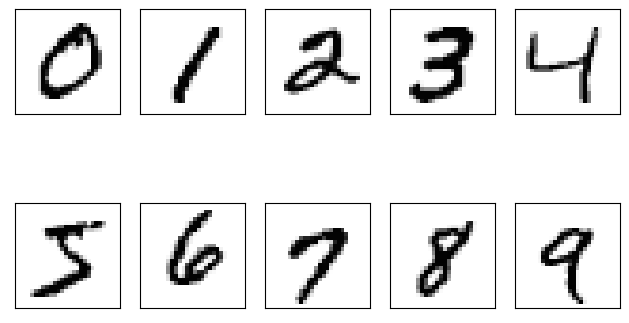

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex = True, sharey= True)
ax = ax.flatten()

for i in range(0, 10):
    img = X[y==i][2].reshape(28,28)
    ax[i].imshow(img, cmap = 'Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

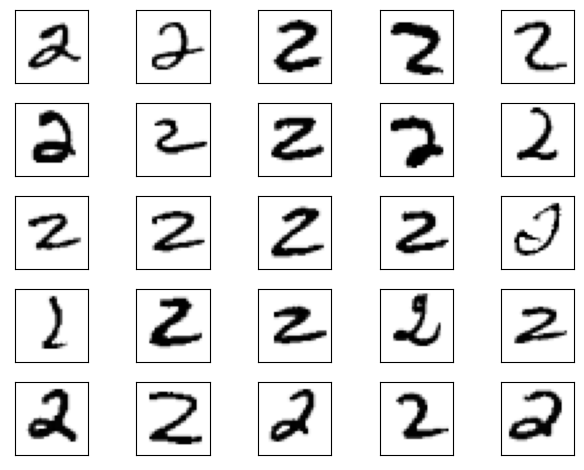

In [9]:
fig, ax = plt.subplots(nrows=5, ncols=5, sharex = True, sharey= True)
ax = ax.flatten()

for i in range(25):
    img = X[y==2][i].reshape(28,28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [4]:
from sklearn.neural_network import MLPClassifier as MLP
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [7]:
mlp = MLP(hidden_layer_sizes=(50,20,10,5,), activation='logistic',max_iter=50)
mlp.fit(X_train, y_train)

c:\Users\patri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(50, 20, 10, 5),
              max_iter=50)

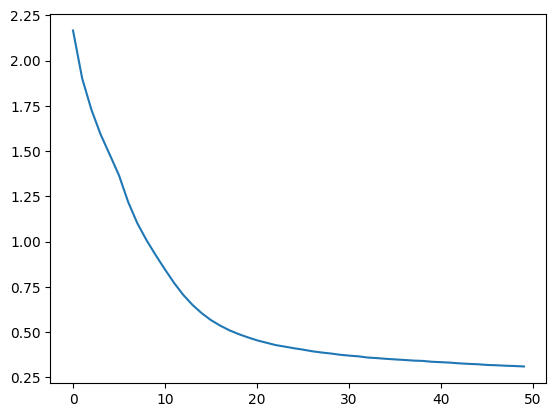

In [13]:
plt.plot(mlp.loss_curve_)

Accuracy:  0.902


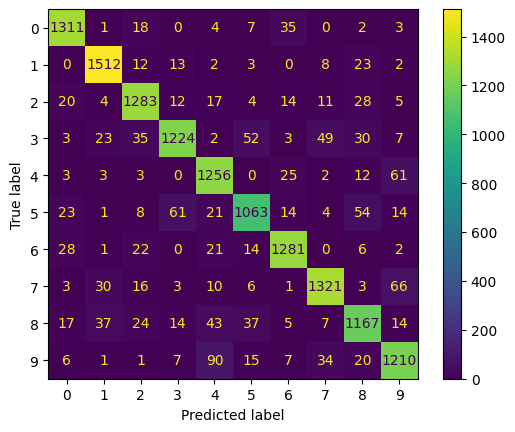

In [14]:
y_pred = mlp.predict(X_test)

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
print('Accuracy: ', accuracy_score(y_test, y_pred))

In [33]:
import pandas as pd

for i in range (10):
    y_test_num = y_test[y_test == i]
    y_pred_num = y_pred[y_test == i]
    prcnt = len(y_test_num[y_test_num==y_pred_num])/len(y_test_num)
    print('percent of', i, 'correct:', round(prcnt,2))
print('Success rate of labeling %i was: %f' %(i,round(prcnt,2)))

percent of 0 correct: 0.96
percent of 1 correct: 0.97
percent of 2 correct: 0.9
percent of 3 correct: 0.89
percent of 4 correct: 0.94
percent of 5 correct: 0.88
percent of 6 correct: 0.95
percent of 7 correct: 0.93
percent of 8 correct: 0.88
percent of 9 correct: 0.91
Success rate of labeling 9 was: 0.910000


In [11]:
mlp = MLP(hidden_layer_sizes=(10,5), activation='logistic',max_iter=50, verbose=True, tol=0.0001)
mlp.fit(X_train, y_train)

Iteration 1, loss = 2.16651402
Iteration 2, loss = 1.90077955
Iteration 3, loss = 1.72867699
Iteration 4, loss = 1.59210294
Iteration 5, loss = 1.47970946
Iteration 6, loss = 1.36575479
Iteration 7, loss = 1.21811033
Iteration 8, loss = 1.10045271
Iteration 9, loss = 1.00688417
Iteration 10, loss = 0.92415229
Iteration 11, loss = 0.84570911
Iteration 12, loss = 0.77074324
Iteration 13, loss = 0.70453800
Iteration 14, loss = 0.64964856
Iteration 15, loss = 0.60405658
Iteration 16, loss = 0.56608207
Iteration 17, loss = 0.53583074
Iteration 18, loss = 0.51003562
Iteration 19, loss = 0.48915934
Iteration 20, loss = 0.47111695
Iteration 21, loss = 0.45466965
Iteration 22, loss = 0.44168918
Iteration 23, loss = 0.42873927
Iteration 24, loss = 0.42011140
Iteration 25, loss = 0.41107088
Iteration 26, loss = 0.40328862
Iteration 27, loss = 0.39430946
Iteration 28, loss = 0.38759175
Iteration 29, loss = 0.38202518
Iteration 30, loss = 0.37518728
Iteration 31, loss = 0.37027572
Iteration 32, los

c:\Users\patri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(10, 5), max_iter=50,
              verbose=True)

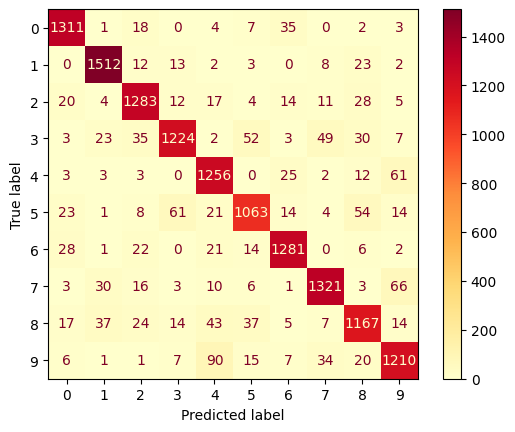

In [30]:
def plotConfusionMatrix(y_test, y_pred):
    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap='YlOrRd')

plotConfusionMatrix(y_test,y_pred)
accuracy_score(y_test, y_pred)

In [29]:
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression()
lgr.fit(X_train, y_train)

c:\Users\patri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

0.9213571428571429

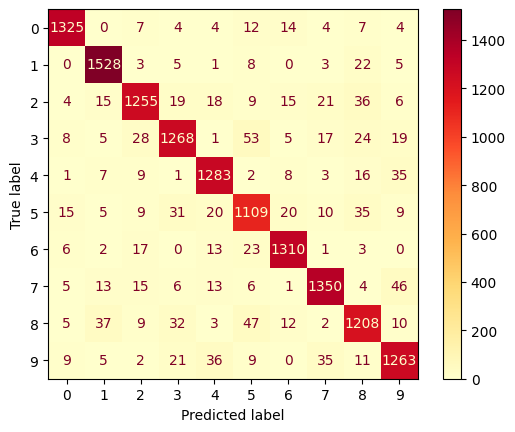

In [32]:
y_pred = lgr.predict(X_test)

plotConfusionMatrix(y_test, y_pred)
accuracy_score(y_test, y_pred)